Introduction to Data Visualization in python from https://link.medium.com/bwOJno8oq4 .
This is not fully related with this course.


### Importing Datasets

In this notebook, we will use two datasets which are freely available. The **Iris** and **Wine Reviews** dataset, which we can both load in using **pandas** read_csv method.


In [1]:
import pandas as pd
iris = pd.read_csv('Iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']) 
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0) 
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Matplotlib

**Matplotlib** is the most popular python plotting library. It is a low-level library with a Matlab like interface which offers lots of freedom at the cost of having to write more code.

In [3]:
import matplotlib.pyplot as plt

### Scatter Plot

To create a scatter plot in Matplotlib we can use the **scatter method**. We will also create a figure and an axis using plt.subplots so we can give our plot a title and labels.

Text(0, 0.5, 'sepal_width')

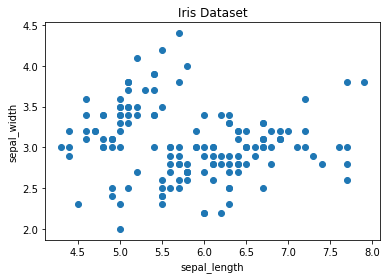

In [4]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can give the graph more meaning by coloring in each data-point by its class. This can be done by creating a dictionary which maps from class to color and then scattering each point on its own using a for-loop and passing the respective color.

Text(0, 0.5, 'sepal_width')

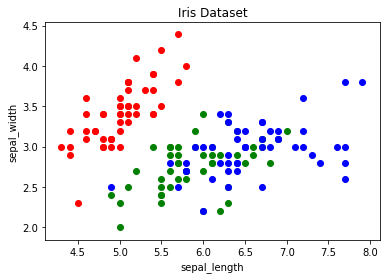

In [5]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line Chart

In Matplotlib we can create a line chart by calling the **plot method**. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

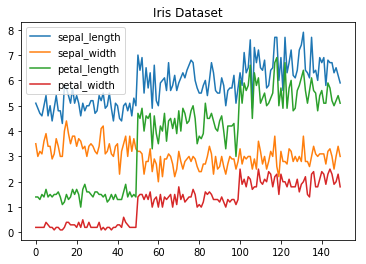

In [6]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

### Histogram

In Matplotlib we can create a Histogram using the **hist method**. If we pass it categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

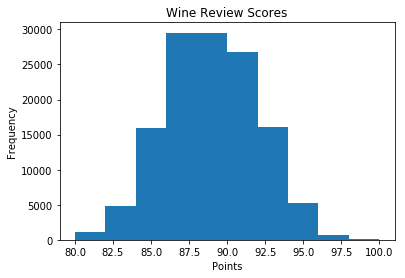

In [7]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar Chart

A bar chart can be created using the **bar method**. The bar-chart isn’t automatically calculating the frequency of a category so we are going to use pandas value_counts function to do this. The bar-chart is useful for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

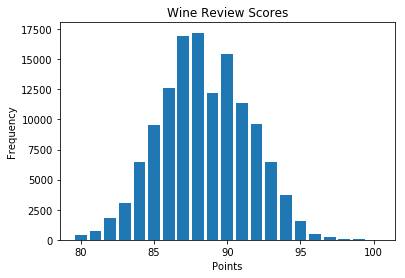

In [8]:

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

## Pandas Visualization

Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools.
Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. It also has a higher level API than Matplotlib and therefore we need less code for the same results.

### Scatter Plot

To create a scatter plot in Pandas we can call **\<dataset>.plot.scatter()** and pass it two arguments, the name of the x-column as well as the name of the y-column. Optionally we can also pass it a title.

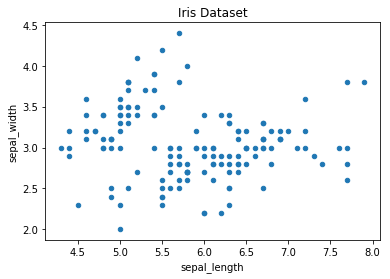

In [9]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')


### Line Chart

To create a line-chart in Pandas we can call **\<dataframe>.plot.line()**. Whilst in Matplotlib we needed to loop-through each column we wanted to plot, in Pandas we don’t need to do this because it automatically plots all available numeric columns (at least if we don’t specify a specific column/s).

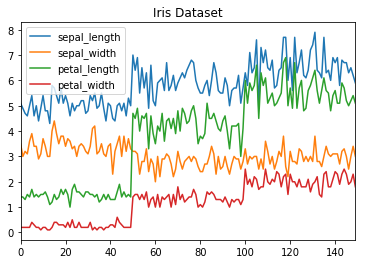

In [10]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')


### Histogram

In Pandas, we can create a Histogram with the **plot.hist method**. There aren’t any required arguments but we can optionally pass some like the bin size.

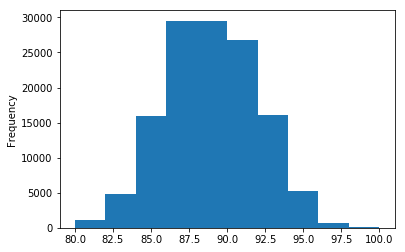

In [11]:
wine_reviews['points'].plot.hist()


It’s also really easy to create multiple histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6CAD54160>,
      dtype=object)

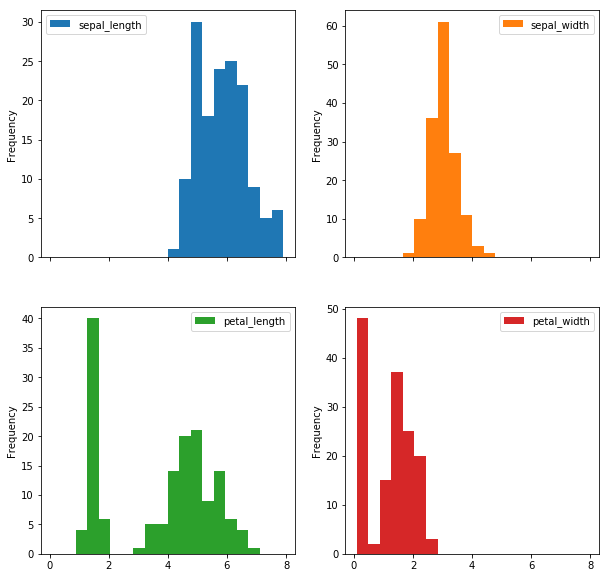

In [12]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)


### Bar Chart 

To plot a bar-chart we can use the **plot.bar() method**, but before we can call this we need to get our data. For this we will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.

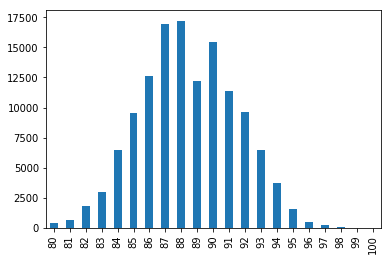

In [13]:
wine_reviews['points'].value_counts().sort_index().plot.bar()


It’s also really simple to make a horizontal bar-chart using the **plot.barh() method**.

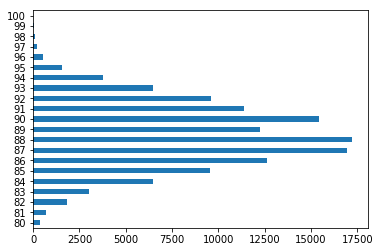

In [14]:
wine_reviews['points'].value_counts().sort_index().plot.barh()


We can also plot other data then the number of occurrences.

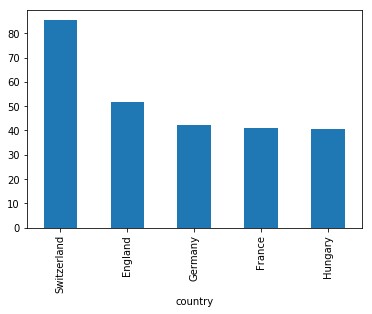

In [15]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()
